In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [0]:
x_train = np.memmap('drive/My Drive/Xtrain.dat', shape=(600000, 2351), dtype=np.float32)
y_train = np.memmap('drive/My Drive/Ytrain.dat', dtype=np.float32)
# 0 for benign (nb of elm => 300000)
# 1 for malicious (nb of elm => 300000)

In [14]:
print(x_train.shape)
print(y_train.shape)

(600000, 2351)
(600000,)


In [15]:
# split the data into two parts (training set and validation set)
x_train, x_test = x_train[:550000], x_train[550000:]
y_train, y_test = y_train[:550000], y_train[550000:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(550000, 2351)
(550000,)
(50000, 2351)
(50000,)


In [0]:
# normalize the input data (standard normalization)
# standard normalization is more efficient than min max normalization in our case

std_scaler = preprocessing.StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [17]:
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

print(x_train.shape)
print(x_test.shape)

(550000, 1, 2351)
(50000, 1, 2351)


In [18]:
print(x_train)

[[[-1.2493665  -0.6904891  -0.49055332 ... -0.00898379 -0.00787839
    0.00409734]]

 [[-0.931376    0.13481581  0.39443153 ... -0.00898379 -0.00787839
    0.00409734]]

 [[-0.31193215  1.5821611  -0.27036646 ... -0.00898379 -0.00787839
    0.00409734]]

 ...

 [[ 0.35253862 -0.30548707 -0.18661703 ... -0.00898379 -0.00787839
    0.00409734]]

 [[ 0.394764   -0.6825863  -0.46710926 ... -0.00898379 -0.00787839
    0.00409734]]

 [[-0.11660464  1.0340551   3.1445181  ... -0.00898379 -0.00787839
    0.00409734]]]


In [0]:
# neural net
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Activation
from keras import optimizers
from keras.regularizers import l1

from keras.backend import sigmoid
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation

In [0]:
# definition of the swish activation funtion for tests
def swish(x):
  return x * sigmoid(x)

get_custom_objects().update({'swish': Activation(swish)})

In [0]:
# creation of the model
model = Sequential()
model.add(Flatten(input_shape=[1, 2351]))

# h1
model.add(Dense(4600, activation='linear', activity_regularizer=l1(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.01))

# h2
model.add(Dense(2000, activation='linear', activity_regularizer=l1(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.01))

# h3
model.add(Dense(600, activation='linear', activity_regularizer=l1(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.01))

model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2351)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4600)              10819200  
_________________________________________________________________
activation_2 (Activation)    (None, 4600)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4600)              18400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 4600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              9202000   
_________________________________________________________________
activation_3 (Activation)    (None, 2000)             

In [0]:
# compile the model
adm = optimizers.adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])

In [24]:
#fit the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=8, batch_size=64, shuffle=True)

440000/440000 [==============================] - 152s 345us/step - loss: 48.4846 - acc: 0.8937 - val_loss: 38.3084 - val_acc: 0.9576
Epoch 2/8
440000/440000 [==============================] - 119s 271us/step - loss: 37.6513 - acc: 0.9443 - val_loss: 37.8649 - val_acc: 0.9466
Epoch 3/8
440000/440000 [==============================] - 103s 234us/step - loss: 37.5812 - acc: 0.9455 - val_loss: 38.2703 - val_acc: 0.9543
Epoch 4/8
440000/440000 [==============================] - 103s 234us/step - loss: 37.6104 - acc: 0.9451 - val_loss: 39.2444 - val_acc: 0.9610
Epoch 5/8
440000/440000 [==============================] - 138s 313us/step - loss: 37.5977 - acc: 0.9457 - val_loss: 38.1726 - val_acc: 0.9406
Epoch 6/8
440000/440000 [==============================] - 103s 234us/step - loss: 37.6252 - acc: 0.9457 - val_loss: 38.1824 - val_acc: 0.9342
Epoch 7/8
440000/440000 [==============================] - 135s 307us/step - loss: 37.6590 - acc: 0.9462 - val_loss: 38.2541 - val_acc: 0.9500
Epoch 8/8

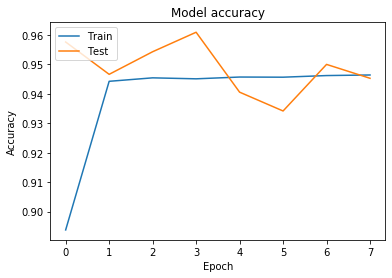

In [25]:
# evaluate our model

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.save('drive/My Drive/models_save/dnn.h5')

In [0]:
model_ = load_model('drive/My Drive/models_save/dnn.h5')

In [28]:
# evaluate our model
loss, acc = model_.evaluate(x_test, y_test, verbose=2)

print("loss: " + str(loss))
print("acc: " + str(acc))

loss: 22.79894802307129
acc: 0.91984
